In [1]:
# This is test to create a mean -reversion strategy

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [6]:
ticker = 'TATAPOWER.NS'
download_data = yf.download(tickers=ticker,period = '1mo', interval = '5m')

[*********************100%%**********************]  1 of 1 completed


In [7]:
# help(yf.download)

In [8]:
download_data
data = pd.DataFrame()
data['close'] = download_data['Adj Close']
data['price_returns'] = np.log(data['close']/data['close'].shift(1))
data['DailyReturn'] = data['close'].pct_change()
data['cum_rtn'] = data['DailyReturn'].cumsum()
data['CumulativeReturn'] = (1 + data['DailyReturn']).cumprod()
data['CumulativeMax'] = data['CumulativeReturn'].cummax()
data['Drawdown'] = (data['CumulativeReturn'] - data['CumulativeMax']) / data['CumulativeMax']
data['Max_DD'] = data['Drawdown'].min()
data

,close,price_returns,DailyReturn,cum_rtn,CumulativeReturn,CumulativeMax,Drawdown,Max_DD
Datetime,,,,,,,,
2025-01-15 09:15:00+05:30,357.100006,NaN,NaN,NaN,NaN,NaN,NaN,-0.116223
2025-01-15 09:20:00+05:30,357.149994,0.000140,0.000140,0.000140,1.000140,1.000140,0.000000,-0.116223
2025-01-15 09:25:00+05:30,357.450012,0.000840,0.000840,0.000980,1.000980,1.000980,0.000000,-0.116223
2025-01-15 09:30:00+05:30,356.000000,-0.004065,-0.004057,-0.003077,0.996920,1.000980,-0.004057,-0.116223
2025-01-15 09:35:00+05:30,357.700012,0.004764,0.004775,0.001699,1.001680,1.001680,0.000000,-0.116223
...,...,...,...,...,...,...,...,...
2025-02-14 15:05:00+05:30,337.700012,0.000296,0.000296,-0.050709,0.945673,1.052926,-0.101862,-0.116223
2025-02-14 15:10:00+05:30,337.549988,-0.000444,-0.000444,-0.051154,0.945253,1.052926,-0.102261,-0.116223
2025-02-14 15:15:00+05:30,336.600006,-0.002818,-0.002814,-0.053968,0.942593,1.052926,-0.104787,-0.116223


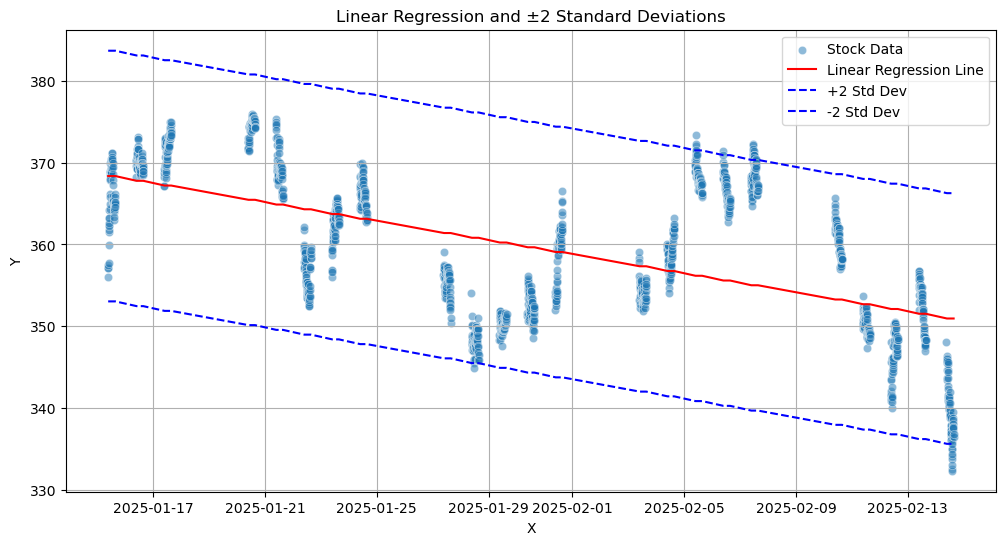

In [17]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
calculate_LR(data, ax1)

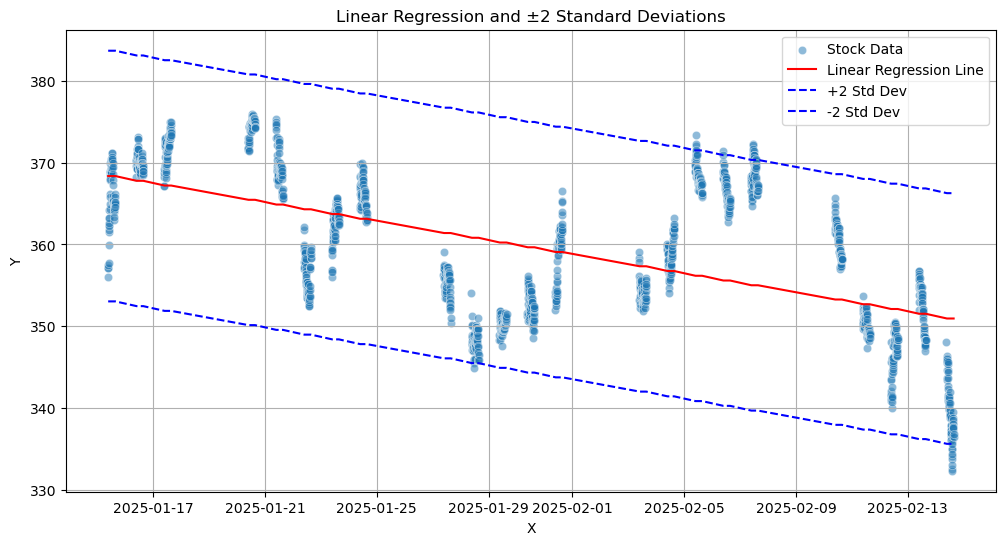

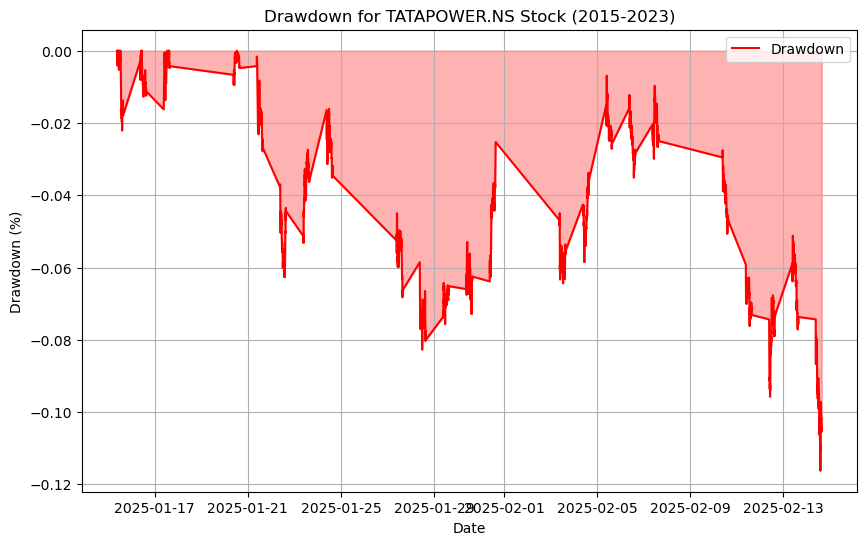

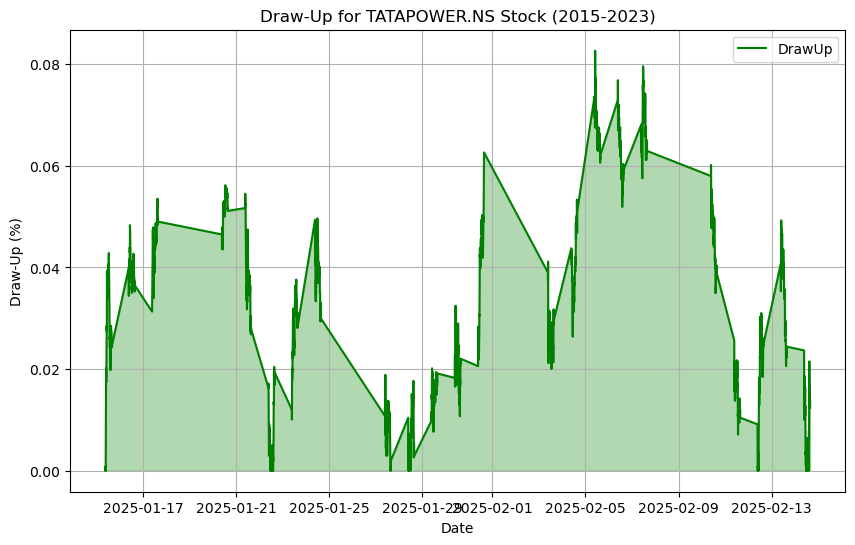

In [18]:
calculate_LR(data)
calculate_DD(data)
calculate_DU(data)

In [17]:
# data['cum_rtn'].plot(figsize = (10,5));

In [11]:
def calculate_LR(df, ax= None):
    y = np.array(data['close'])
    X = pd.to_datetime(data['close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)
    
    # Calculate standard deviation
    std_dev = np.std(y - regression_line)
    plus_2_std = regression_line + 2 * std_dev
    minus_2_std = regression_line - 2 * std_dev
    X = pd.to_datetime(data['close'].index)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X, y=y, label='Stock Data', alpha=0.5)
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')
    plt.plot(X, plus_2_std, color='blue', linestyle='--', label='+2 Std Dev')
    plt.plot(X, minus_2_std, color='blue', linestyle='--', label='-2 Std Dev')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression and ±2 Standard Deviations')
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
def calculate_DD(data):
    # Calculate daily returns
    data['DailyReturn'] = data['close'].pct_change()

    # Calculate cumulative returns
    data['CumulativeReturn'] = (1 + data['DailyReturn']).cumprod()

    # Calculate the running maximum of the cumulative returns (peak value at any time)
    data['CumulativeMax'] = data['CumulativeReturn'].cummax()

    # Calculate the drawdown (percentage decline from the peak)
    data['Drawdown'] = (data['CumulativeReturn'] - data['CumulativeMax']) / data['CumulativeMax']

    # Plot the Drawdown
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
    plt.fill_between(data.index, data['Drawdown'], color='red', alpha=0.3)  # Fill the area under the curve
    plt.title(f'Drawdown for {ticker} Stock (2015-2023)')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


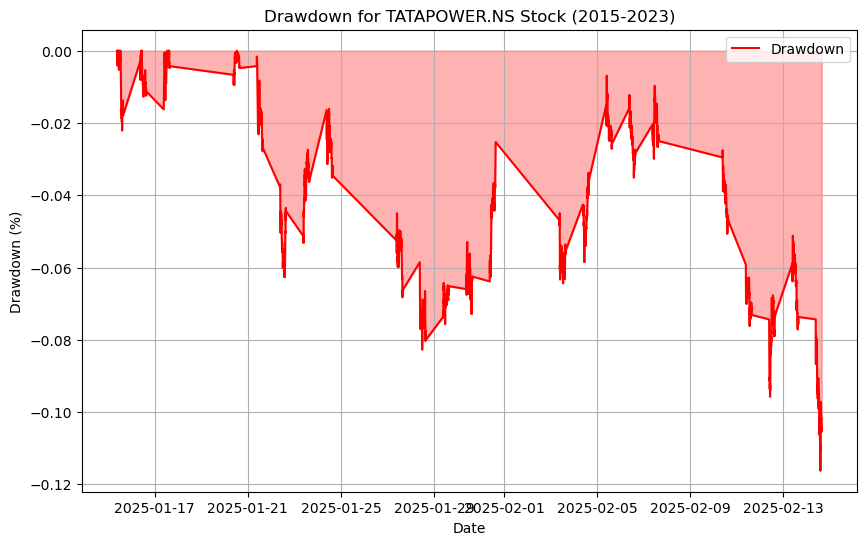

In [13]:
calculate_DD(data)

In [14]:
def calculate_DU(data):
    # Calculate daily returns
    data['DailyReturn'] = data['close'].pct_change()

    # Calculate cumulative returns
    data['CumulativeReturn'] = (1 + data['DailyReturn']).cumprod()

    # Identify the troughs and calculate the draw-up
    data['CumulativeMin'] = data['CumulativeReturn'].cummin()  # Track the minimum value of the cumulative return

    # Calculate the draw-up as the percentage increase from the trough to the current value
    data['DrawUp'] = (data['CumulativeReturn'] - data['CumulativeMin']) / data['CumulativeMin']

    # Plot the Draw-up
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['DrawUp'], label='DrawUp', color='green')
    plt.fill_between(data.index, data['DrawUp'], color='green', alpha=0.3)  # Fill the area under the curve
    plt.title(f'Draw-Up for {ticker} Stock (2015-2023)')
    plt.xlabel('Date')
    plt.ylabel('Draw-Up (%)')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()


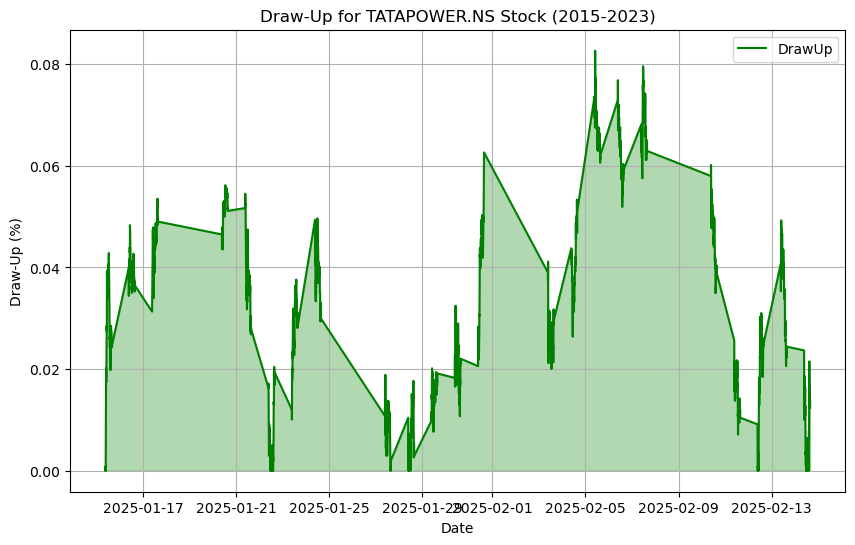

In [15]:
calculate_DU(data)